In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [4]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.shape


(28242, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [7]:
df.isnull().sum()


Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [8]:
df.duplicated().sum()


2310

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [11]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [12]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [13]:
df = df.drop(to_drop)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [14]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)
len(df['Area'].unique())

101

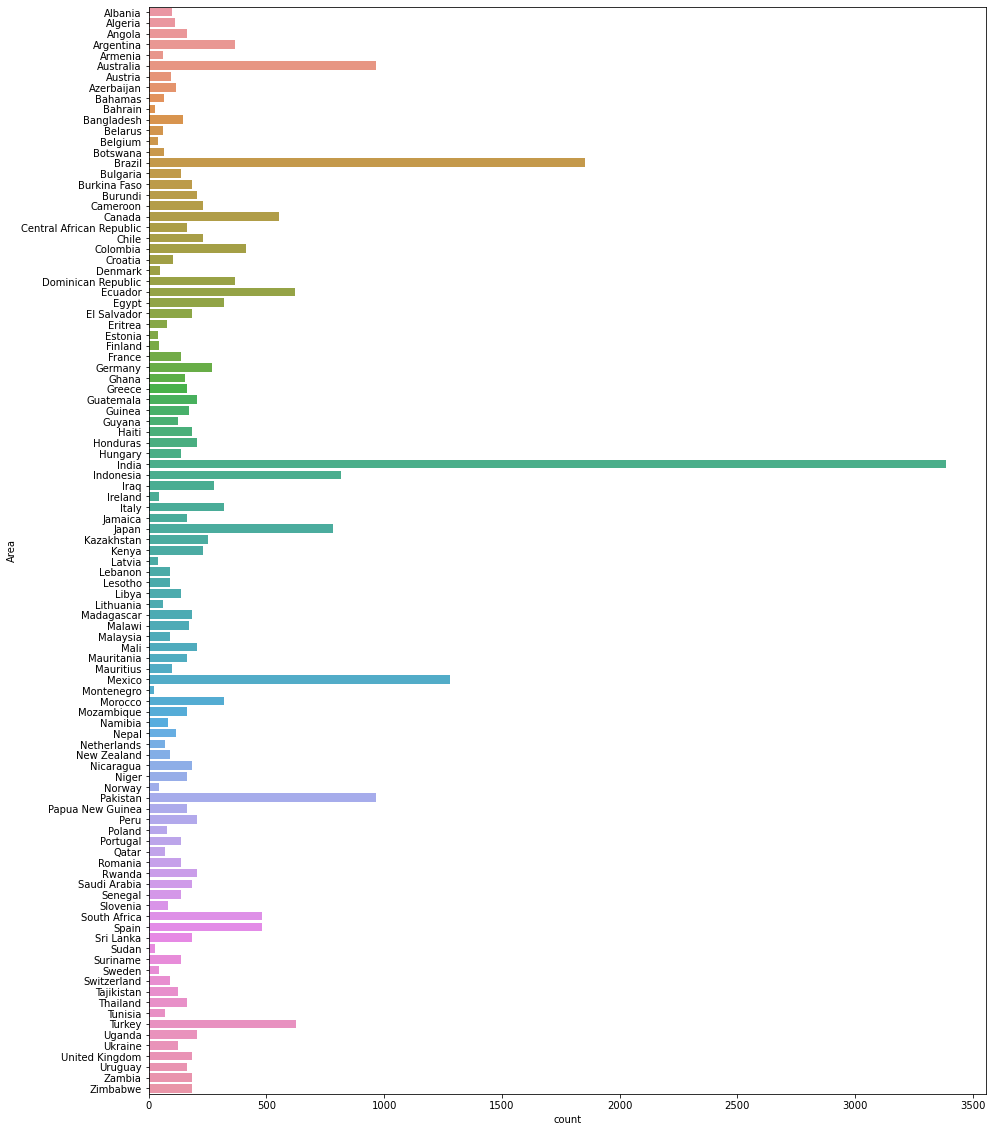

In [15]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [16]:
(df['Area'].value_counts() < 500).sum()

91

In [17]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [18]:
df['hg/ha_yield'].sum()

1996196943

In [19]:
yield_per_country


[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

<Axes: >

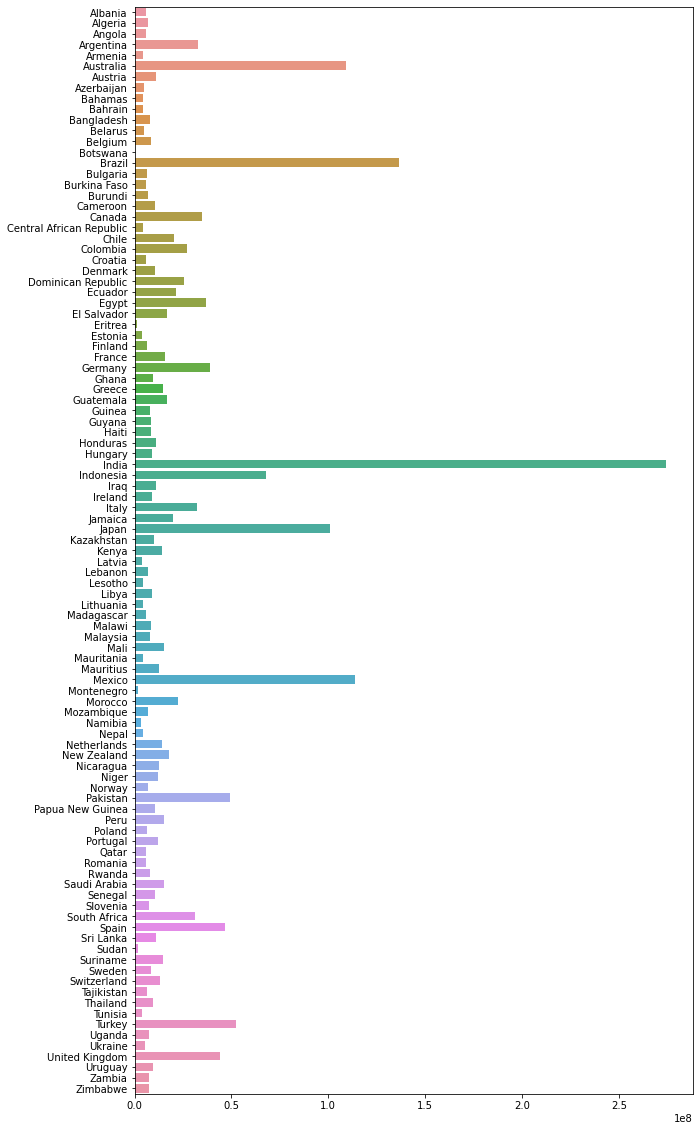

In [20]:
plt.figure(figsize=(10, 20))
sns.barplot(y=country, x=yield_per_country)

<Axes: xlabel='count', ylabel='Item'>

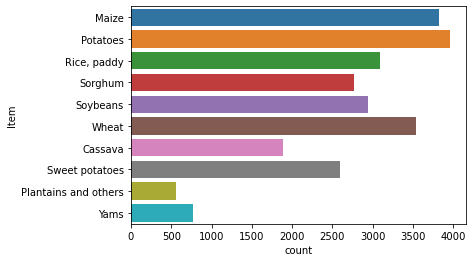

In [21]:
sns.countplot(y=df['Item'])

In [22]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

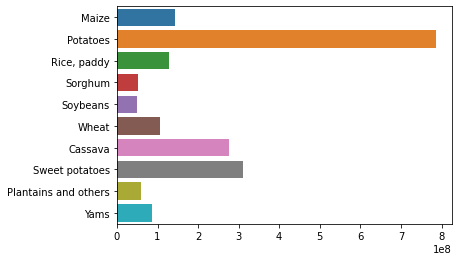

In [23]:
sns.barplot(y=crops,x=yield_per_crop)

In [24]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [25]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [26]:
col = ['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp','Area','Item']
df = df[col]
df

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
0,1990,36613,1485.0,121.00,16.37,Albania,Maize
1,1990,66667,1485.0,121.00,16.37,Albania,Potatoes
2,1990,23333,1485.0,121.00,16.37,Albania,"Rice, paddy"
3,1990,12500,1485.0,121.00,16.37,Albania,Sorghum
4,1990,7000,1485.0,121.00,16.37,Albania,Soybeans
...,...,...,...,...,...,...,...
28237,2013,22581,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy"
28238,2013,3066,657.0,2550.07,19.76,Zimbabwe,Sorghum
28239,2013,13142,657.0,2550.07,19.76,Zimbabwe,Soybeans
28240,2013,22222,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes


In [27]:
x = df.drop('hg/ha_yield',axis=1)
y = df['hg/ha_yield']


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [29]:
X_train.shape

(20745, 6)

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()


In [31]:
preprocesser = ColumnTransformer(
transformers = [
    ('StandardScale', scale, [0, 1, 2, 3]),
    ('onehotencoder', ohe, [4, 5]),
],
remainder='passthrough'
)


In [32]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(),
                                 [0, 1, 2, 3]),
                                ('onehotencoder', OneHotEncoder(drop='first'),
                                 [4, 5])])

In [33]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)


In [34]:
X_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122877 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'knr':KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    print(f"{name} MSE : {mean_squared_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")


lr MSE : 1821708810.9780462 score : 0.7486567057192473


C:\Users\janakiram\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199884855870.75, tolerance: 14819338848.544132
  model = cd_fast.sparse_enet_coordinate_descent(


lss MSE : 1822234027.6229124 score : 0.7485842409647616
rg MSE : 1822539282.313284 score : 0.7485421246182795
knr MSE : 127913289.58507806 score : 0.982351653901624
dtr MSE : 159624700.0408714 score : 0.9779763935294854


In [37]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)


array([160124.,  15838.,  72614., ...,  52692.,   9621., 132600.])

In [38]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)
    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)
    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)
    return predicted_yield[0]


In [39]:
Year = 2000
average_rain_fall_mm_per_year =59.0
pesticides_tonnes = 3024.11
avg_temp = 26.55
Area = 'Saudi Arabia'
Item = 'Sorghum'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

C:\Users\janakiram\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\janakiram\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [40]:
result

array([13384.])

In [41]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))


In [42]:
import sklearn
print(sklearn.__version__)

1.2.2


In [43]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\janakiram\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex, sklearn
Note: you may need to restart the kernel to use updated packages.
